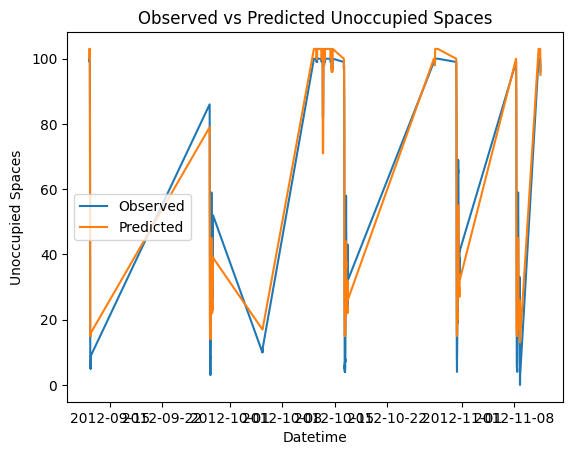

Mean Squared Error: 38.33960843373494
Mean Absolute Error: 4.807981927710843
R-squared: 0.9727783082259686
Mean Squared Log Error: 0.15052321123349335
   Occupied Spaces        Date      Time            Datetime   Timestamp  \
0               20  2012-01-01  12:00:00 2012-01-01 12:00:00  1325419200   
1               40  2012-01-02  12:00:00 2012-01-02 12:00:00  1325505600   
2               51  2012-01-03  12:00:00 2012-01-03 12:00:00  1325592000   

   Predicted Unoccupied Spaces  
0                         68.0  
1                         46.0  
2                         36.0  


In [2]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_log_error


# Step 1: Read the Data
data = pd.read_csv('cloudy.csv')

# Step 2: Preprocess the Data
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.sort_values('Datetime')

# Step 3: Perform Poisson Regression
X = data[['Occupied Spaces']]
y = data['Unoccupied Spaces']
poisson_model = PoissonRegressor().fit(X, y)

# Step 4: Visualize Results
predicted_values = poisson_model.predict(X).round()

# Add predicted values to original DataFrame
data['Predicted Unoccupied Spaces'] = predicted_values

# Plot Observed vs Predicted Unoccupied Spaces
fig, ax = plt.subplots()
ax.plot(data['Datetime'], data['Unoccupied Spaces'], label='Observed')
ax.plot(data['Datetime'], data['Predicted Unoccupied Spaces'], label='Predicted')
ax.set_xlabel('Datetime')
ax.set_ylabel('Unoccupied Spaces', rotation=90, labelpad=5)
ax.set_title('Observed vs Predicted Unoccupied Spaces')
ax.legend()
plt.show()

# Step 5: Model Evaluation
mse = mean_squared_error(data['Unoccupied Spaces'], predicted_values)
mae = mean_absolute_error(data['Unoccupied Spaces'], predicted_values)
r2 = r2_score(data['Unoccupied Spaces'], predicted_values)
msle = mean_squared_log_error(data['Unoccupied Spaces'], predicted_values)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Mean Squared Log Error:", msle)

# Step 6: Make Predictions
new_data = pd.DataFrame({
    'Occupied Spaces': [20, 40, 51],
    'Date': ['2012-01-01', '2012-01-02', '2012-01-03'],  
    'Time': ['12:00:00', '12:00:00', '12:00:00']  
})

# Convert 'Date' and 'Time' to 'Datetime'
new_data['Datetime'] = pd.to_datetime(new_data['Date'] + ' ' + new_data['Time'])

# Convert 'Datetime' to numerical 'Timestamp'
new_data['Timestamp'] = (new_data['Datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Make predictions
new_data['Predicted Unoccupied Spaces'] = poisson_model.predict(new_data[['Occupied Spaces']]).round()

print(new_data)

# Step 8: Export DataFrame with predictions to CSV
data['Predicted Unoccupied Spaces'] = predicted_values

data.to_csv('data_with_predictions.csv', index=False)

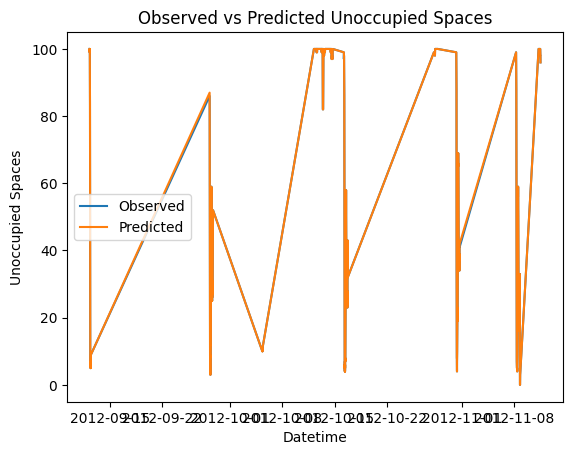

Mean Squared Error: 0.022347076331360235
Mean Absolute Error: 0.02974895436673263
R-squared: 0.9999841332436925


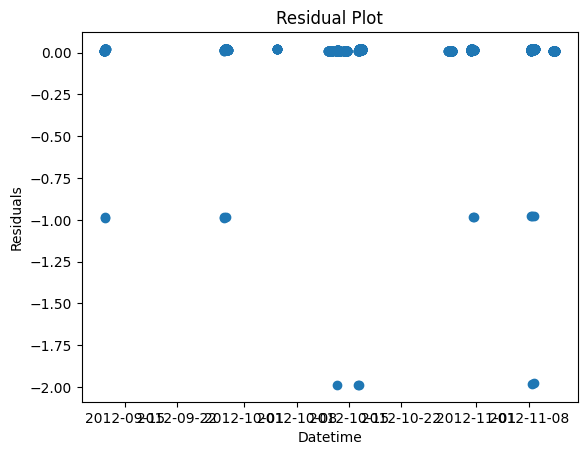

Intercept: 100.20733895529352
Coefficient: -1.0001082598022566
   Occupied Spaces        Date      Time            Datetime   Timestamp  \
0               20  2012-01-01  12:00:00 2012-01-01 12:00:00  1325419200   
1               40  2012-01-02  12:00:00 2012-01-02 12:00:00  1325505600   
2               51  2012-01-03  12:00:00 2012-01-03 12:00:00  1325592000   

   Predicted Unoccupied Spaces  
0                         80.0  
1                         60.0  
2                         49.0  


In [24]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Step 1: Read the Data
data = pd.read_csv('cloudy.csv')

data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.sort_values('Datetime')

# Convert 'Datetime' to numerical
data['Timestamp'] = (data['Datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Step 3: Perform Linear Regression
X = data[['Occupied Spaces', 'Timestamp']]
y = data['Unoccupied Spaces'].values
linear_model = LinearRegression().fit(X, y)

# Step 4: Visualize Results
predicted_values = linear_model.predict(X)

# Plot Observed vs Predicted Unoccupied Spaces
fig, ax = plt.subplots()
ax.plot(data['Datetime'], data['Unoccupied Spaces'], label='Observed')
ax.plot(data['Datetime'], predicted_values, label='Predicted')
ax.set_xlabel('Datetime')
ax.set_ylabel('Unoccupied Spaces', rotation=90, labelpad=5)
ax.set_title('Observed vs Predicted Unoccupied Spaces')
ax.legend()
plt.show()

# Step 5: Model Evaluation
mse = mean_squared_error(data['Unoccupied Spaces'], predicted_values)
mae = mean_absolute_error(data['Unoccupied Spaces'], predicted_values)
r2 = r2_score(data['Unoccupied Spaces'], predicted_values)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


# Step 6: Residual Analysis
residuals = data['Unoccupied Spaces'] - predicted_values
plt.scatter(data['Datetime'], residuals)
plt.xlabel('Datetime')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 7: Print model coefficients
print("Intercept:", linear_model.intercept_)
print("Coefficient:", linear_model.coef_[0])

# Step 6: Make Predictions
new_data = pd.DataFrame({
    'Occupied Spaces': [20, 40, 51],
    'Date': ['2012-01-01', '2012-01-02', '2012-01-03'],  
    'Time': ['12:00:00', '12:00:00', '12:00:00']  
})

# Convert 'Date' and 'Time' to 'Datetime'
new_data['Datetime'] = pd.to_datetime(new_data['Date'] + ' ' + new_data['Time'])

# Convert 'Datetime' to numerical 'Timestamp'
new_data['Timestamp'] = (new_data['Datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Make predictions
new_data['Predicted Unoccupied Spaces'] = linear_model.predict(new_data[['Occupied Spaces', 'Timestamp']]).round()

print(new_data)

# Step 8: Export DataFrame with predictions to CSV
data['Predicted Unoccupied Spaces'] = predicted_values
data.to_csv('data_with_predictions.csv', index=False)

